In [1]:
import numpy as np
import copy

import pandas as pd
pd.set_option('display.max_columns', 100)

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

## Exploratory Analysis

In [2]:
# importing training dataset into variable train_full

train_full = pd.read_csv('train.csv')
test_full = pd.read_csv('test.csv')

# changing the index then dropping the PassengerId column
train_full.index = train_full.PassengerId
train_full.drop('PassengerId',axis= 1,inplace = True)

train_full.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# checking shape of dataset
train_full.shape

(891, 11)

In [4]:
# Overview of the training dataset based on numerical features
train_full.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# checking types of data
train_full.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [6]:
# checking null values
train_full.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

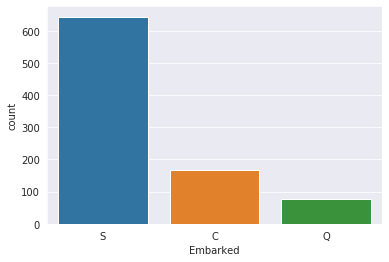

In [7]:
#plotting the Embarked feature

sns.countplot(train_full['Embarked'])
plt.show()

### Observations

- missing values in Embarked will be filled by S
- we will try to see the repartition of ages and create a new feature (0 = 0 to 18, 1 = 18 and more)
- lots of missing values in Cabin: maybe we should drop them first and after try another approach 

## Data cleaning

In [8]:
# replacing missing values in Embarked feature
train_full.Embarked.fillna('S', inplace = True)
# checking
train_full.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

/home/stanislas/anaconda3/envs/elite_ds/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/stanislas/anaconda3/envs/elite_ds/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


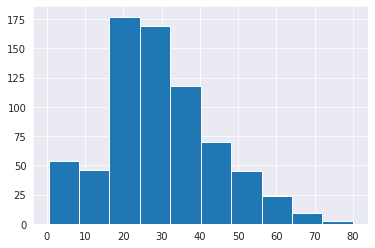

In [9]:
# Checking the age distribution
plt.hist('Age', data = train_full)
plt.show()

In [10]:
# replacing null values with age.mean() because I don't have any better ideas at the moment
train_full.Age.fillna(value = round(train_full.Age.mean(), 2), inplace = True)

In [11]:
# dropping cabin feature
train_full.drop('Cabin', axis = 1, inplace=True)

# dropping Ticket and Name feature because I don't know what to do with it yet
train_full.drop(['Name', 'Ticket'], axis =1, inplace = True)

In [12]:
train_full.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


## Feature engineering

In [13]:
# engineering Underage feature
train_full['Underage'] = (train_full.Age < 18).astype(int)
train_full.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Underage
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,0
2,1,1,female,38.0,1,0,71.2833,C,0
3,1,3,female,26.0,0,0,7.9250,S,0
4,1,1,female,35.0,1,0,53.1000,S,0
5,0,3,male,35.0,0,0,8.0500,S,0


In [14]:
# Create dummy features for Sex and Embarked
train_full = pd.get_dummies(train_full, columns=['Sex', 'Embarked'])

In [15]:
train_full.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Underage,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,0,1,0,0,1
2,1,1,38.0,1,0,71.2833,0,1,0,1,0,0
3,1,3,26.0,0,0,7.9250,0,1,0,0,0,1
4,1,1,35.0,1,0,53.1000,0,1,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,0,1,0,0,1


## Model creation

In [16]:
# splitting target from dataset
y = train_full.Survived
X = train_full.drop('Survived', axis = 1)

# Use train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state=123)

In [17]:
# defining a RandomForest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=123)

## Model training

In [18]:
# fitting the model
rf_model.fit(X_train, y_train)

# making prediction on validation set
rf_predict = rf_model.predict(X_valid)

print('MAE', mean_absolute_error(y_valid, rf_predict))

MAE 0.21874012494333725


In [19]:
test_full.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [20]:
print(test_full.shape)
test_full.isnull().sum()

(418, 11)


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Creating helper function in order to simplify data preprocessing

In [21]:
def clean_dataset(path_to_csv=''):
    # open the dataset
    df = pd.read_csv(path_to_csv)
    df_copy = df.copy()
    # changing the index then dropping the PassengerId column
    df_copy.index = df_copy.PassengerId
    df_copy.drop('PassengerId',axis= 1,inplace = True)
    
    # replacing missing values in Embarked feature
    df_copy.Embarked.fillna('S', inplace = True)
    # replacing null values with age.mean() because I don't have any better ideas at the moment
    df_copy.Age.fillna(value = round(df_copy.Age.mean(), 2), inplace = True)

    #dropping columns I don't know what to do with yet
    df_copy.drop(['Cabin', 'Name', 'Ticket'], axis =1, inplace = True)
    
    return df_copy

In [22]:
def feature_engineering(df):
    # Underage feature
    df_copy = df.copy()
    df_copy['Underage'] = (df_copy.Age < 18).astype(int)
    
    # Create dummy features for Sex and Embarked
    df_copy = pd.get_dummies(df_copy, columns=['Sex', 'Embarked'])
    
    
    return df_copy

In [23]:
def create_train_rf(cleaned_df):
    # splitting target from dataset
    y = cleaned_df['Survived']
    X = cleaned_df.drop('Survived', axis = 1)

    # Use train_test_split
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state=123)
    
    # defining a RandomForest model
    model = RandomForestRegressor(n_estimators=100, random_state=123)
    
        # fitting the model
    model.fit(X_train, y_train)

    # making prediction on validation set
    predictions = model.predict(X_valid)

    print('MAE', mean_absolute_error(y_valid, rf_predict))

In [70]:
data_to_predict = clean_dataset('test.csv')



ids = data_to_predict.index

data_to_predict.Fare.fillna(0, inplace = True)
data_to_predict = feature_engineering(data_to_predict)

In [68]:
predictions = rf_model.predict(data_to_predict)
data_to_predict.shape

(418, 11)

In [71]:
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.shape

(418, 2)

In [73]:
result = output.to_csv('gender_submission', index = None)